In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import json

In [2]:
def print_dict(d: dict) -> None:
    print(json.dumps(d, indent=2))

In [3]:
ticker_name = "CDR.WA"
yf_ticker = yf.Ticker(ticker_name)
print_dict(yf_ticker.info)

{
  "address1": "Building E",
  "address2": "ul. Jagiellonska 74",
  "city": "Warsaw",
  "zip": "03-301",
  "country": "Poland",
  "phone": "48 22 519 6900",
  "fax": "48 22 375 7710",
  "website": "https://www.cdprojekt.com",
  "industry": "Electronic Gaming & Multimedia",
  "industryKey": "electronic-gaming-multimedia",
  "industryDisp": "Electronic Gaming & Multimedia",
  "sector": "Communication Services",
  "sectorKey": "communication-services",
  "sectorDisp": "Communication Services",
  "longBusinessSummary": "CD Projekt S.A., together its subsidiaries, engages in the development, publishing, and digital distribution of video games for personal computers and video game consoles in Poland. The company operates through two segments, CD PROJEKT RED and GOG.com. Its product portfolio comprises The Witcher; The Witcher 2: Assassins of Kings; The Witcher 3: Wild Hunt; Thronebreaker: The Witcher Tales; Gwent: The Witcher Card game; and Cyberpunk 2077. The company also distributes video

In [4]:
period = "3mo"
interval = "1d"
historical_data = yf_ticker.history(
    period=period,
    interval=interval,
)
print(historical_data.info())
historical_data.tail(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2024-02-15 00:00:00+01:00 to 2024-05-15 00:00:00+02:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          61 non-null     float64
 1   High          61 non-null     float64
 2   Low           61 non-null     float64
 3   Close         61 non-null     float64
 4   Volume        61 non-null     int64  
 5   Dividends     61 non-null     float64
 6   Stock Splits  61 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.8 KB
None


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-30 00:00:00+02:00,118.199997,119.650002,117.750000,118.500000,244947,0.0,0.0
2024-05-02 00:00:00+02:00,118.500000,123.599998,117.050003,119.550003,528880,0.0,0.0
2024-05-06 00:00:00+02:00,120.000000,126.400002,119.650002,124.099998,695889,0.0,0.0
2024-05-07 00:00:00+02:00,124.199997,129.649994,124.099998,128.500000,654081,0.0,0.0
2024-05-08 00:00:00+02:00,128.000000,134.850006,127.599998,131.800003,901842,0.0,0.0
2024-05-09 00:00:00+02:00,132.600006,134.300003,130.300003,131.500000,248695,0.0,0.0
2024-05-10 00:00:00+02:00,133.000000,133.750000,130.550003,131.750000,311155,0.0,0.0
2024-05-13 00:00:00+02:00,131.000000,142.199997,131.000000,140.850006,946280,0.0,0.0
2024-05-14 00:00:00+02:00,142.000000,144.899994,139.000000,143.050003,867007,0.0,0.0


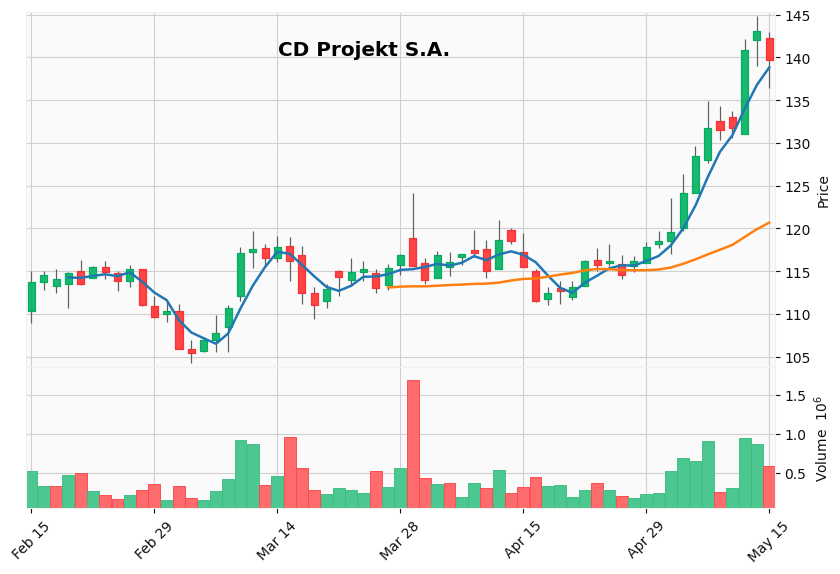

In [5]:
mpf.plot(
    historical_data,
    type="candle",
    mav=(4, 30),
    volume=True,
    style="yahoo",
    figratio=(3, 2),
    figscale=1.0,
    show_nontrading=False,
    title=yf_ticker.info["longName"],
    tight_layout=True,
    warn_too_much_data=10_000,
)

In [6]:
period = "3mo"
interval = "1h"
historical_data_hourly = yf_ticker.history(
    period=period,
    interval=interval,
)
historical_data_hourly["Date"] = historical_data_hourly.index

In [7]:
# https://python.stockindicators.dev/guide/
from stock_indicators import indicators as ind
from stock_indicators import Quote

quotes = [
    Quote(date, open, high, low, close, volume)
    for date, open, high, low, close, volume in zip(
        historical_data_hourly["Date"],
        historical_data_hourly["Open"],
        historical_data_hourly["High"],
        historical_data_hourly["Low"],
        historical_data_hourly["Close"],
        historical_data_hourly["Volume"],
        strict=True,
    )
]

sma = ind.get_sma(quotes, 20)
sma

In [8]:
from pprint import pprint
import inspect


def inspect_object(obj: object) -> None:
    pprint(type(obj))
    pprint(inspect.getmembers(obj))


inspect_object(sma[-1])

<class 'stock_indicators.indicators.sma.SMAResult'>
[('__class__', <class 'stock_indicators.indicators.sma.SMAResult'>),
 ('__delattr__',
  <method-wrapper '__delattr__' of SMAResult object at 0x000002A9CFC6B590>),
 ('__dict__',
  {'_csdata': <Skender.Stock.Indicators.SmaResult object at 0x000002A9CFC6B540>}),
 ('__dir__',
  <built-in method __dir__ of SMAResult object at 0x000002A9CFC6B590>),
 ('__doc__', '\n    A wrapper class for a single unit of SMA results.\n    '),
 ('__eq__',
  <method-wrapper '__eq__' of SMAResult object at 0x000002A9CFC6B590>),
 ('__format__',
  <built-in method __format__ of SMAResult object at 0x000002A9CFC6B590>),
 ('__ge__',
  <method-wrapper '__ge__' of SMAResult object at 0x000002A9CFC6B590>),
 ('__getattribute__',
  <method-wrapper '__getattribute__' of SMAResult object at 0x000002A9CFC6B590>),
 ('__getstate__',
  <built-in method __getstate__ of SMAResult object at 0x000002A9CFC6B590>),
 ('__gt__',
  <method-wrapper '__gt__' of SMAResult object at 0x00

In [9]:
[item.sma for item in sma]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 114.16749992370606,
 114.05249977111816,
 113.90749969482422,
 113.7599998474121,
 113.73499984741211,
 113.71500015258789,
 113.70750007629394,
 113.69000015258788,
 113.71000022888184,
 113.78000030517578,
 113.83250045776367,
 113.83250045776367,
 113.94000053405762,
 114.03000030517578,
 114.11250038146973,
 114.11000061035156,
 114.09500045776367,
 114.02250022888184,
 113.96500015258789,
 114.00499992370605,
 114.03499984741211,
 114.2125,
 114.41749992370606,
 114.61499977111816,
 114.7,
 114.77749977111816,
 114.8349998474121,
 114.91499977111816,
 114.9375,
 114.96500015258789,
 114.9775001525879,
 114.99750022888183,
 114.94249992370605,
 114.8974998474121,
 114.8974998474121,
 114.91999969482421,
 114.92749977111816,
 114.93499984741212,
 114.93999977111817,
 114.90999984741211,
 114.9,
 114.86499977111816,
 114.8625,
 114.84750022888184,
 114

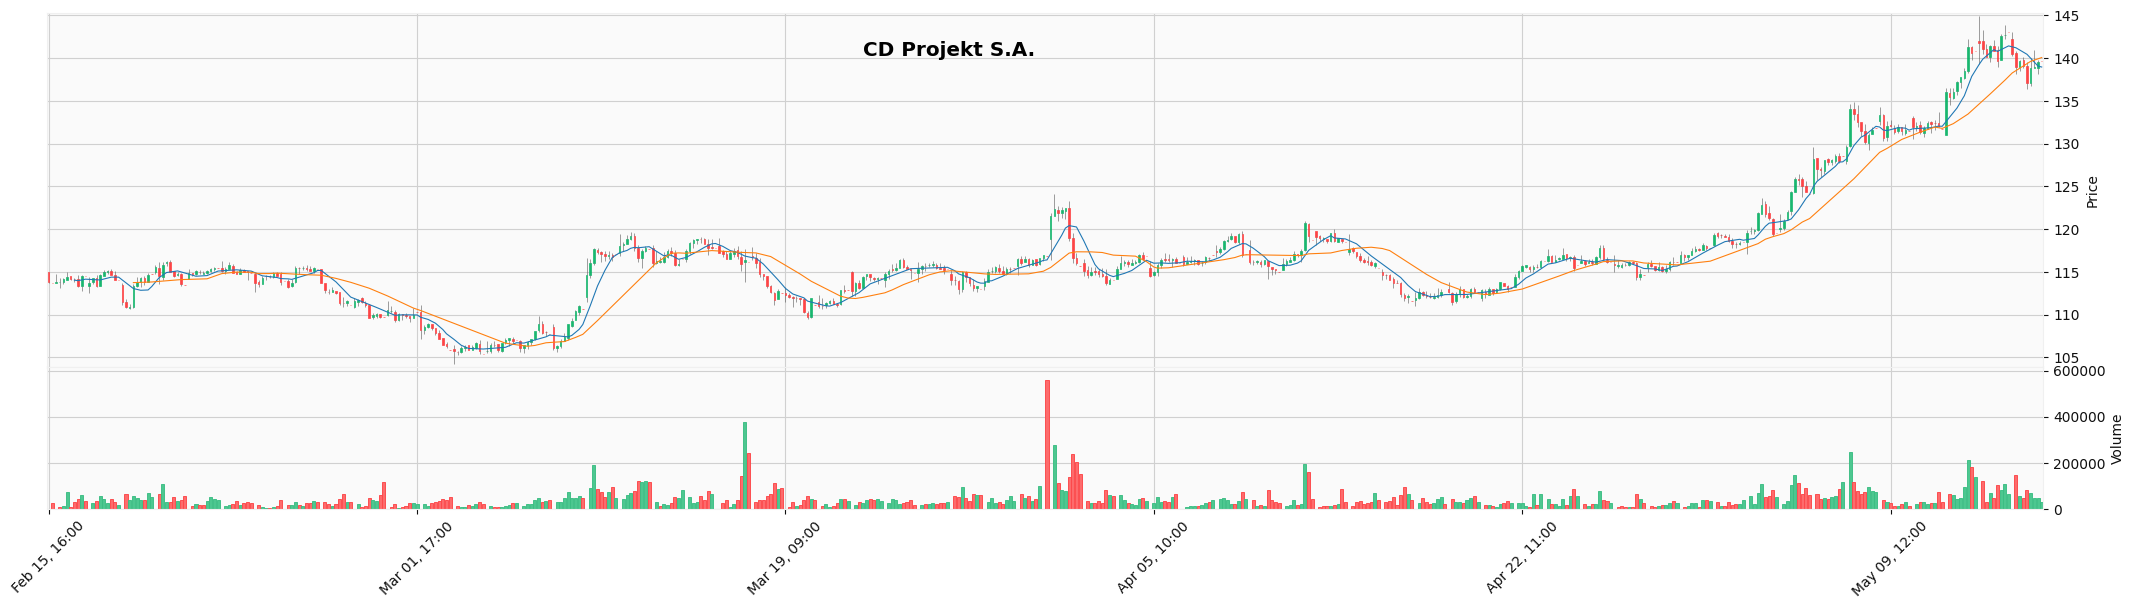

In [11]:
mpf.plot(
    historical_data_hourly,
    type="candle",
    mav=(8, 24),
    volume=True,
    style="yahoo",
    figratio=(4, 1),
    figscale=1.0,
    title=yf_ticker.info["longName"],
    tight_layout=True,
    show_nontrading=False,
    warn_too_much_data=10_000,
)